In [1]:
import datetime

import numpy as np
import pandas as pd
import xarray as xr
# import xgcm
import cftime

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.patheffects as path_effects
from mpl_toolkits.axes_grid1 import make_axes_locatable

import MITgcmutils as mutil

import sys
sys.path.append('/nethome/4302001/diffusion-hydro-mod/tools/')
import ACC_tools

In [2]:
trajdir = '/data/oceanparcels/output_data/data_Daan/project_diffusion/dispersion/'

In [3]:
topography_coarse = ACC_tools.read_binary_field("/nethome/4302001/diffusion-hydro-mod/ACC_mitgcm_config/GCM/reentrant_coarse/input_ridge_1y_tracer_locb/bathy.50km.bin",
                                                (40,20),
                                                dtype=np.dtype('float32'))
topography_fine = ACC_tools.read_binary_field("/nethome/4302001/diffusion-hydro-mod/ACC_mitgcm_config/GCM/reentrant_fine/input_ridge_1y_tracers_locb/bathy.5km.bin",
                                                (400,200),
                                                dtype=np.dtype('float32'))

In [4]:
traj_fine = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_fine_advection_180d_dt40m.nc", decode_times=False).isel(obs=slice(0,721))
traj_coarsened = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarsened_advection_180d_dt40m.nc", decode_times=False).isel(obs=slice(0,721))
traj_coarse = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarse_advection_180d_dt40m.nc", decode_times=False)
traj_coarse_Redi = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarse_180d_EM_Redi_smallslope_K15000_dt40m.nc", decode_times=False)
traj_coarse_markov1 = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarse_180d_Markov1_K15000_dt40m.nc", decode_times=False)
traj_coarsened_markov1 = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarsened_180d_Markov1_K15000_dt40m.nc", decode_times=False)
traj_coarsened_Redi = xr.open_dataset(trajdir + "absolute_dispersion_ACC_ridge_coarsened_180d_EM_Redi_smallslope_K15000_dt40m.nc", decode_times=False)

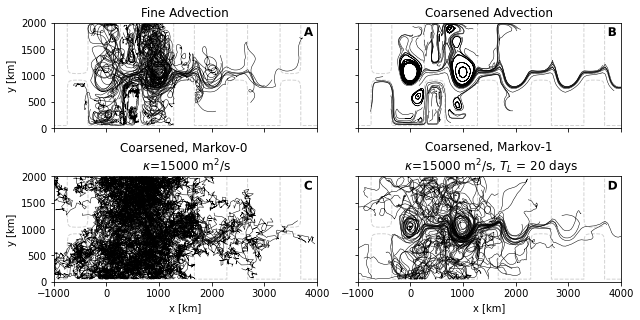

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9,4.5))
rng = np.random.default_rng(1636)
randomSlice = rng.integers(0, traj_fine.traj.shape[0], 100)

traj_fine_sub = traj_fine.isel(traj=randomSlice)
ax[0,0].plot((1/1000*(traj_fine_sub.lon + traj_fine_sub.lon_adjustment).T), 
              1/1000*(traj_fine_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[0,0].set_title("Fine Advection")
A_label = ax[0,0].text(0.95, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0,0].transAxes)
A_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

traj_coarsened_sub = traj_coarsened.isel(traj=randomSlice)
ax[0,1].plot((1/1000*(traj_coarsened_sub.lon + traj_coarsened_sub.lon_adjustment).T), 
              1/1000*(traj_coarsened_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[0,1].set_title("Coarsened Advection")
B_label = ax[0,1].text(0.95, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[0,1].transAxes)
B_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])



traj_coarsened_Redi_sub = traj_coarsened_Redi.isel(traj=randomSlice)
ax[1,0].plot((1/1000*(traj_coarsened_Redi_sub.lon + traj_coarsened_Redi_sub.lon_adjustment).T), 
              1/1000*(traj_coarsened_Redi_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[1,0].set_title("Coarsened, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
C_label = ax[1,0].text(0.95, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[1,0].transAxes)
C_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

traj_coarsened_markov1_sub = traj_coarsened_markov1.isel(traj=randomSlice)
ax[1,1].plot((1/1000*(traj_coarsened_markov1_sub.lon + traj_coarsened_markov1_sub.lon_adjustment).T), 
              1/1000*(traj_coarsened_markov1_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[1,1].set_title("Coarsened, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
D_label = ax[1,1].text(0.95, 0.97, 'D', va='top', fontsize='large', weight='heavy', transform = ax[1,1].transAxes)
D_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

for i in range(2):
    for j in range(2):
        ax[i,j].contour(np.linspace(-1000, 4000, 100), 
                        np.linspace(0, 2000, 40),
                        np.tile(topography_coarse, 5), 
                        levels=[-3900],
                        colors=['lightgrey'],
                        linestyles='dashed',
                        linewidths=1,
                        zorder=-1)
        ax[i,j].set_xlim(-1000, 4000)
        ax[i,j].set_ylim(0, 2000)
        ax[i,j].set_aspect(1)
        if j > 0:
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel("y [km]")
        if i < 1:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel("x [km]")
plt.tight_layout()
plt.savefig("out/sample_trajectories_coarsened.png", dpi=600, bbox_inches='tight')

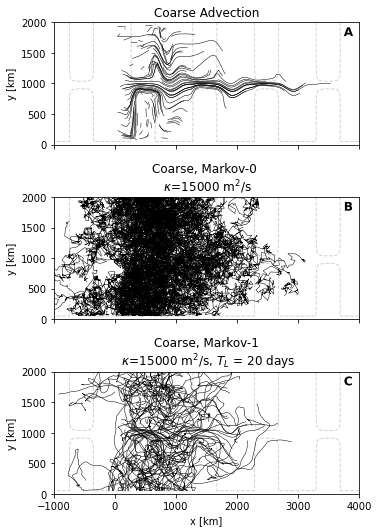

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(5.5,7.5))
rng = np.random.default_rng(1636)
randomSlice = rng.integers(0, traj_fine.traj.shape[0], 100)

traj_coarse_sub = traj_coarse.isel(traj=randomSlice)
ax[0].plot((1/1000*(traj_coarse_sub.lon + traj_coarse_sub.lon_adjustment).T), 
             1/1000*(traj_coarse_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[0].set_title("Coarse Advection")
A_label = ax[0].text(0.95, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0].transAxes)
A_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

traj_coarse_Redi_sub = traj_coarse_Redi.isel(traj=randomSlice)
ax[1].plot((1/1000*(traj_coarse_Redi_sub.lon + traj_coarse_Redi_sub.lon_adjustment).T), 
             1/1000*(traj_coarse_Redi_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[1].set_title("Coarse, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
B_label = ax[1].text(0.95, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[1].transAxes)
B_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

traj_coarse_markov1_sub = traj_coarse_markov1.isel(traj=randomSlice)
ax[2].plot((1/1000*(traj_coarse_markov1_sub.lon + traj_coarse_markov1_sub.lon_adjustment).T), 
             1/1000*(traj_coarse_markov1_sub.lat.T),
             color = 'black',
             linewidth = 0.5);
ax[2].set_title("Coarse, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
C_label = ax[2].text(0.95, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[2].transAxes)
C_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

for i in range(3):
    ax[i].contour(np.linspace(-1000, 4000, 100), 
                np.linspace(0, 2000, 40),
                np.tile(topography_coarse, 5), 
                levels=[-3900],
                colors=['lightgrey'],
                linestyles='dashed',
                linewidths=1,
                zorder=-1)
    ax[i].set_xlim(-1000, 4000)
    ax[i].set_ylim(0, 2000)
    ax[i].set_aspect(1)
    ax[i].set_ylabel("y [km]")
    if i < 2:
        ax[i].set_xticklabels([])
    else:
        ax[i].set_xlabel("x [km]")
plt.tight_layout()
plt.savefig("out/sample_trajectories_coarse.png", dpi=600, bbox_inches='tight')